

Kristina Liu


260 HW 4


The goal of this assignment is to implement the Laplacian edge detection method using the separable convolution routines that you already coded in HW\#3. You will just have to call these routines with different kernels (Gaussian and 1st and 2nd derivatives of Gaussian). Filters should all work with floating point images as input. Also, all convolutions should be separable, use wrapping on the boundary, and all filters that use Gaussians should have a σ (sigma) parameter that you can set.




1.  Implement a function called ‘GradientMagnitude’ that computes gradient magnitude of an image. This filter should use the DoG filters.
2. Implement a function called ‘Laplacian’ that computes the Laplacian of an image using the Gaussian 2nd derivative filters.
3. Implement a function called ‘ZeroCrossings’ that calculates the zero crossings in an image using the neighbor checking routine we discussed in the class. It should set a pixel to **1** if it is a zero crossing and **0** otherwise.
4. Implement a function called ‘LaplaceEdgeDetection’ using the three filters above to do edge detection as we discussed in the class. <u>Hints</u>:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Need a parameter to threshold the gradient magnitude


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Follow thresholding by an **AND** operation with the result of the Laplacian zero\-crossing image.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The resulting images should be binary, i.e., 1 on the edges and 0 elsewhere.


**Assignment:**


All questions involve applying the filters to the image ‘neck\_sagt2\_im8.tif’.



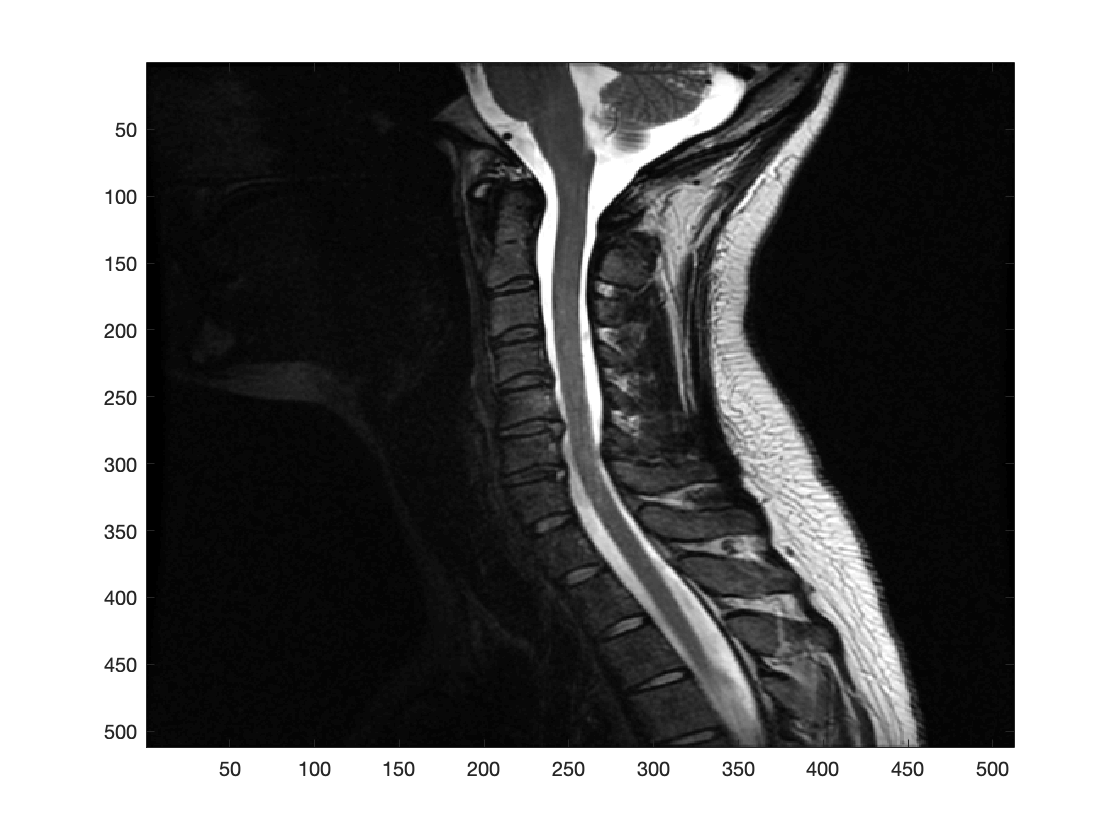

In [1]:
og_im = imread('neck_sagt2_im8.tif');
imagesc(og_im); colormap gray


1)    Apply the ‘GradientMagnitude’ filter with σ = 1. Describe what you see in the background. Now apply your gradient magnitude filter with σ = 8, and describe the background. Why are they different?



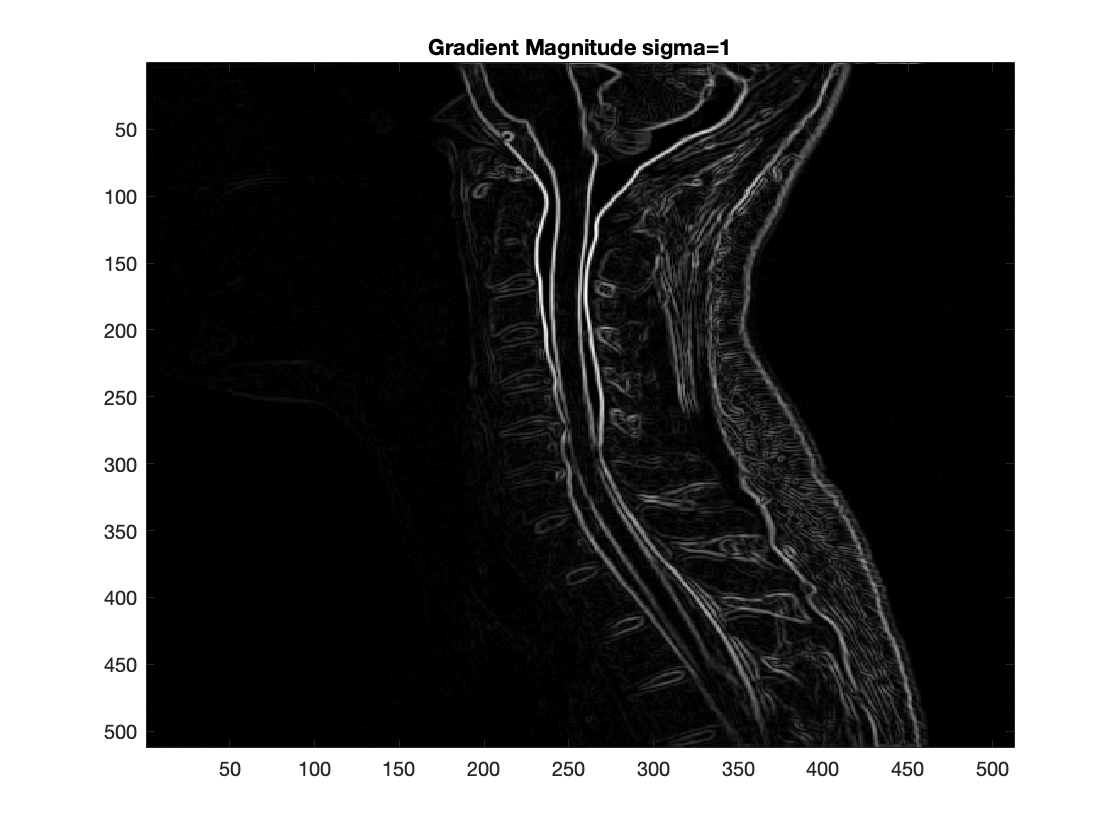

In [2]:
sigma1 = GradientMagnitude('neck_sagt2_im8.tif',1);
figure()
imagesc(sigma1); colormap gray
title('Gradient Magnitude sigma=1')


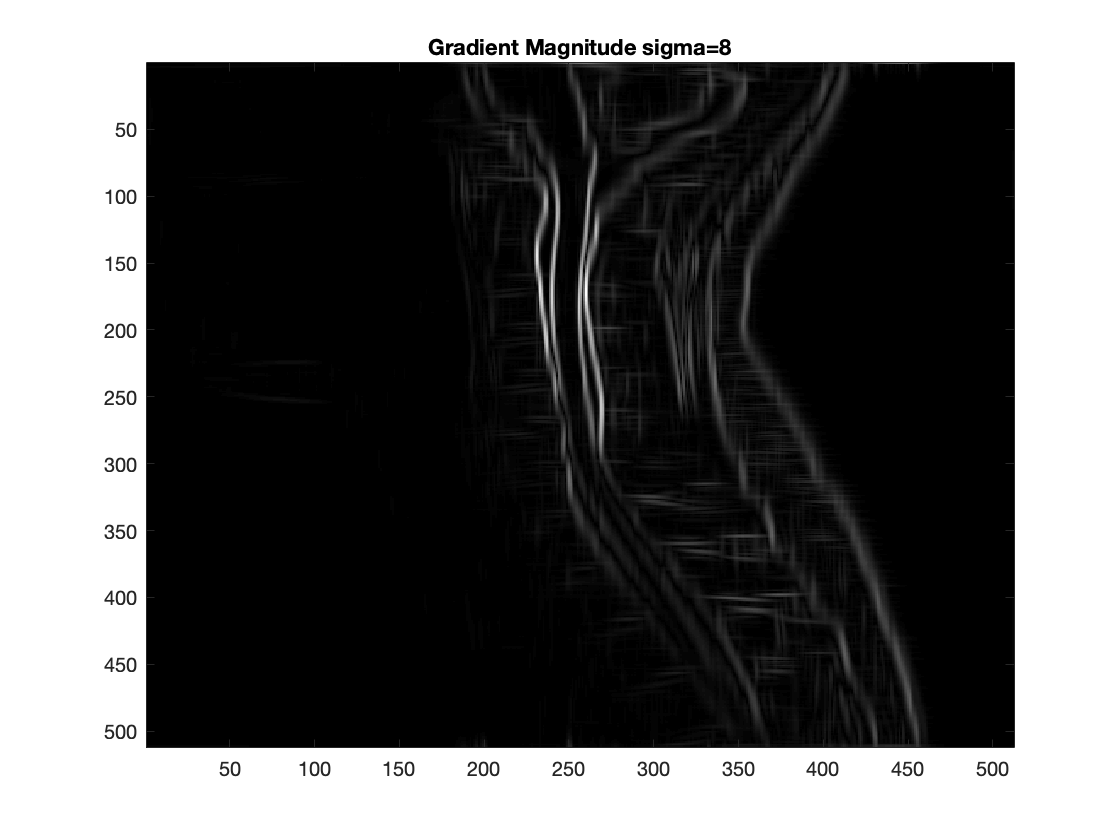

In [3]:
sigma1 = GradientMagnitude('neck_sagt2_im8.tif',8);
figure()
imagesc(sigma1); colormap gray
title('Gradient Magnitude sigma=8')


With sigma=1, you see more pixels inside the edges that should be "background", and with sigma equals 8 you get less. The image is blurred more, so there is less difference within the tissue.


2)    Apply the ‘Laplacian’ filter with σ = 4. Describe why do the transitions from different tissue types differ?



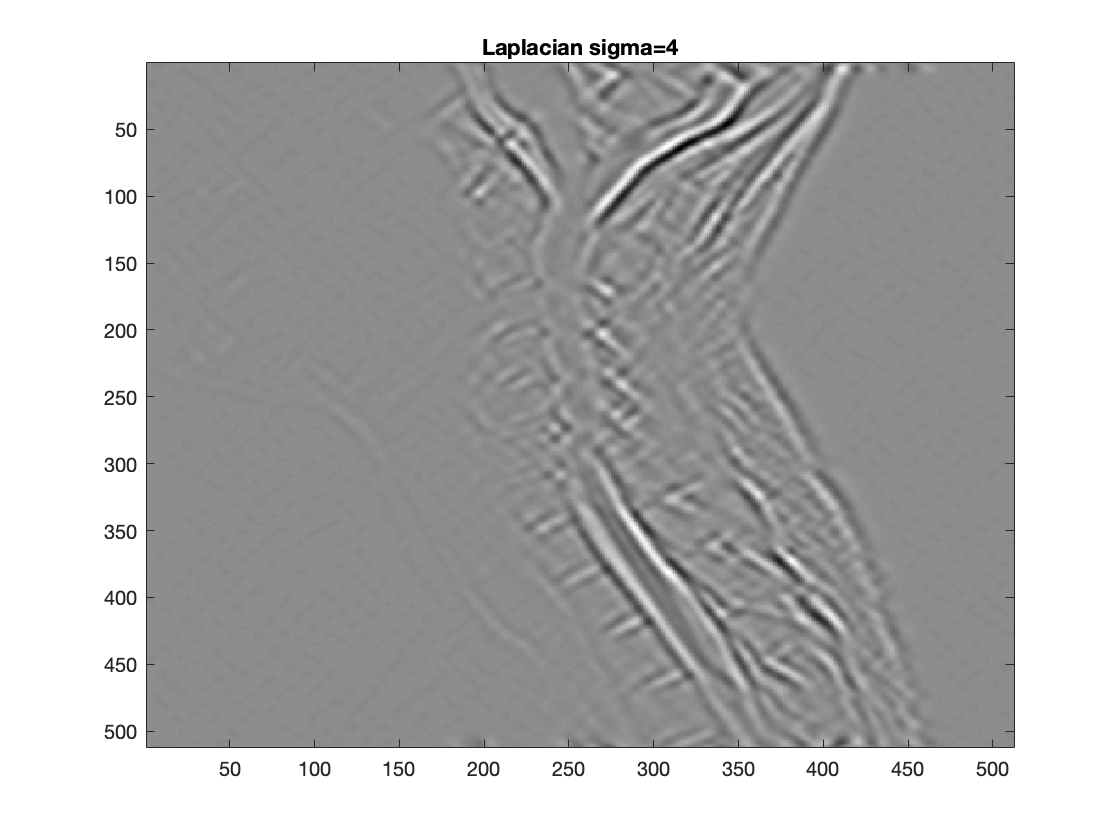

In [4]:
sigma4 = Laplacian('neck_sagt2_im8.tif',4);
figure()
imagesc(sigma4); colormap gray
title('Laplacian sigma=4')


Transitions between tissues with larger contrast difference are brighter after the laplacian filter.


3)    Apply the ‘LaplacianEdgeDetection’ with a fixed threshold of 10, but with increasing values for σ = 1, 4, 8, 16. Describe the problems you see as σ gets larger. For the same values σ = 1, 4, 8 16 try to change the threshold as you change σ to address the problem you observed with fixed threshold of 10. As σ gets larger, in which direction did you have to change the threshold?



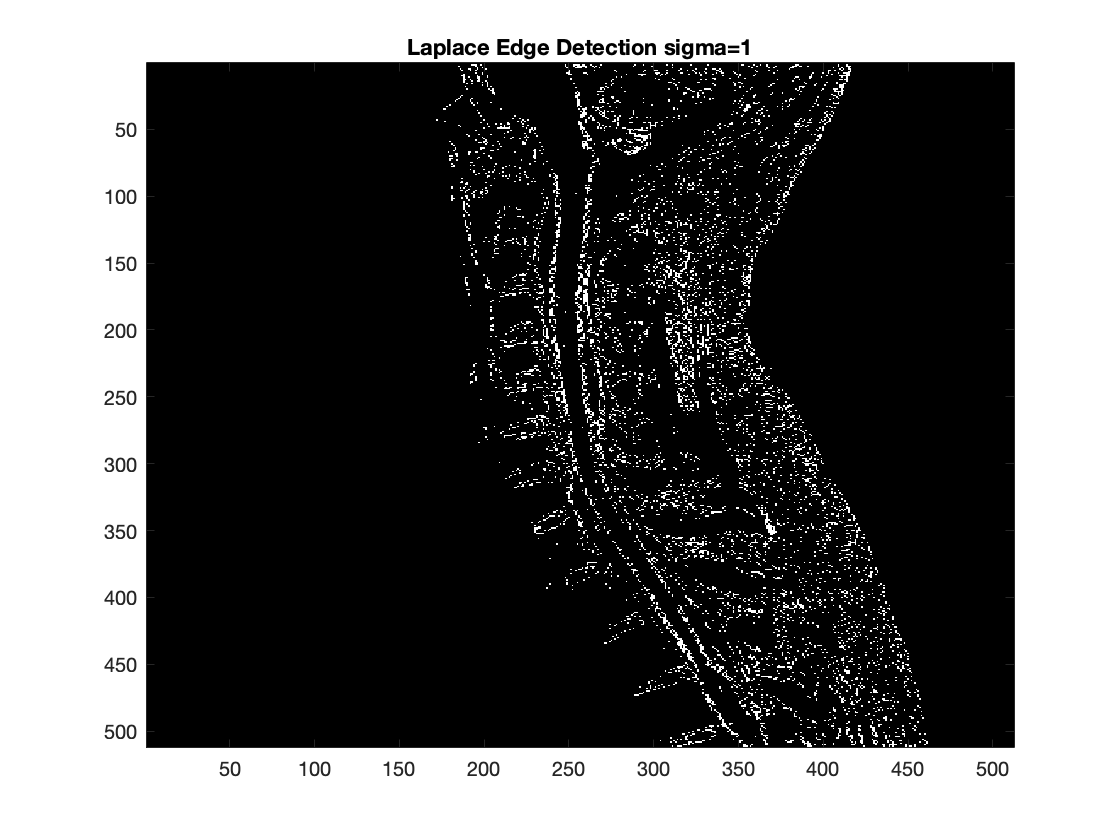

In [5]:
edgesigma1 = LaplacianEdgeDetection('neck_sagt2_im8.tif',1,10);
figure()
imagesc(edgesigma1); colormap gray
title('Laplace Edge Detection sigma=1')


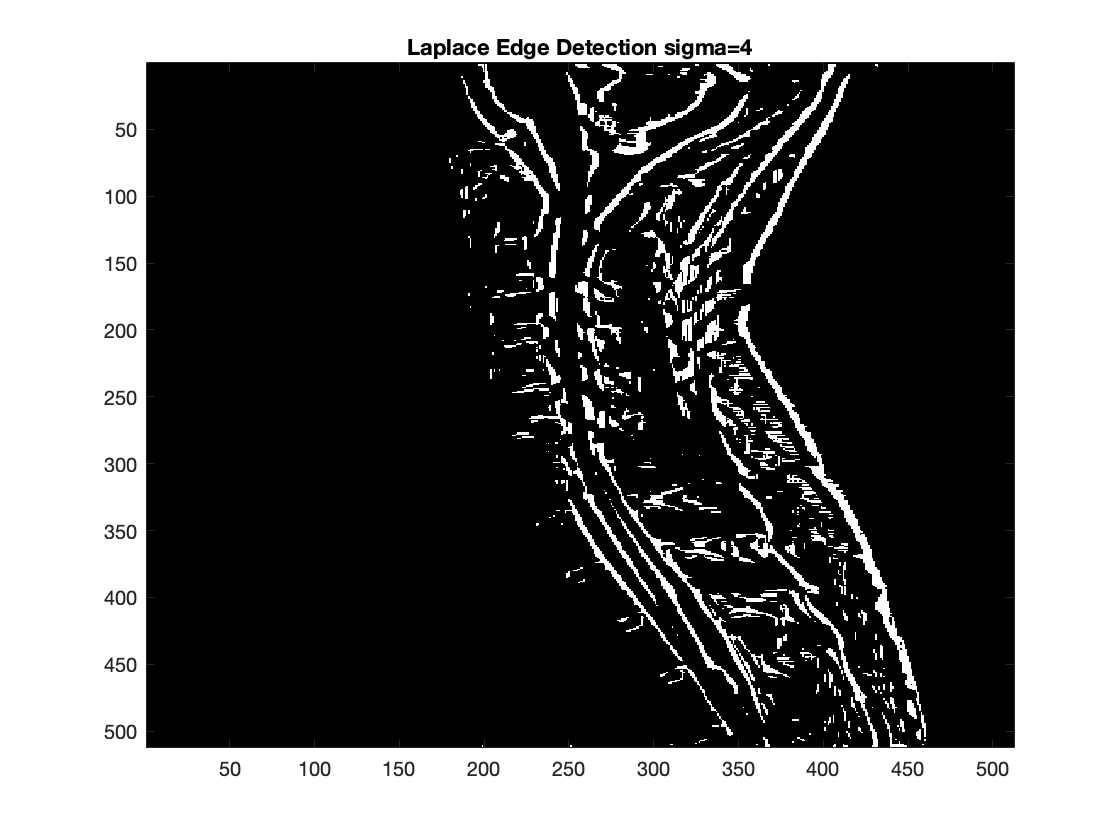

In [6]:
edgesigma4 = LaplacianEdgeDetection('neck_sagt2_im8.tif',4,10);
figure()
imagesc(edgesigma4); colormap gray
title('Laplace Edge Detection sigma=4')


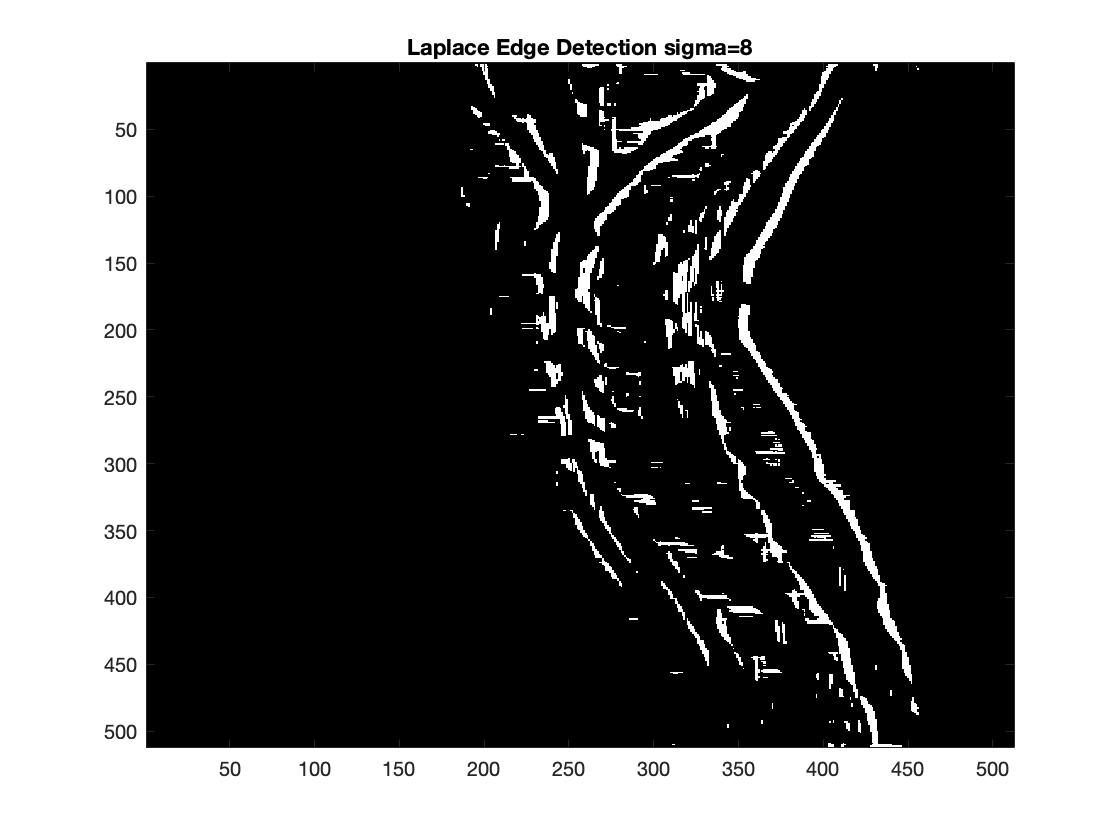

In [7]:
edgesigma8 = LaplacianEdgeDetection('neck_sagt2_im8.tif',8,10);
figure()
imagesc(edgesigma8); colormap gray
title('Laplace Edge Detection sigma=8')


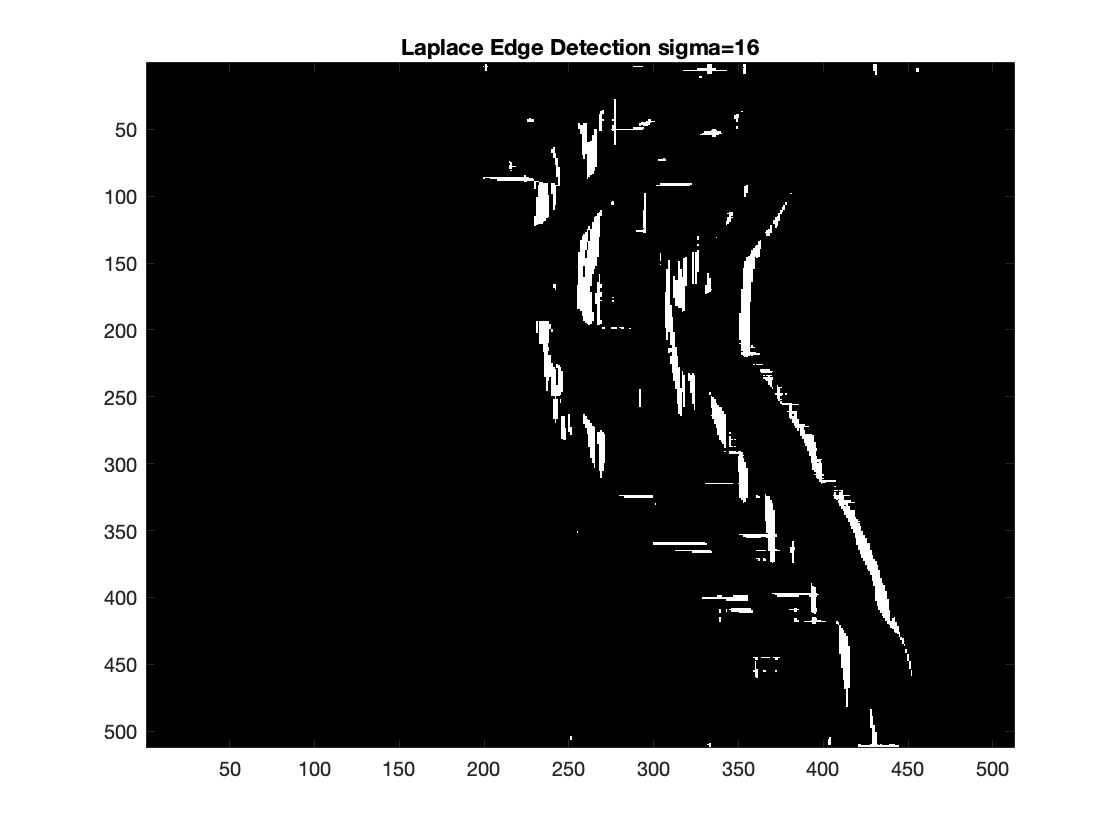

In [8]:
edgesigma16 = LaplacianEdgeDetection('neck_sagt2_im8.tif',16,10);
figure()
imagesc(edgesigma16); colormap gray
title('Laplace Edge Detection sigma=16')


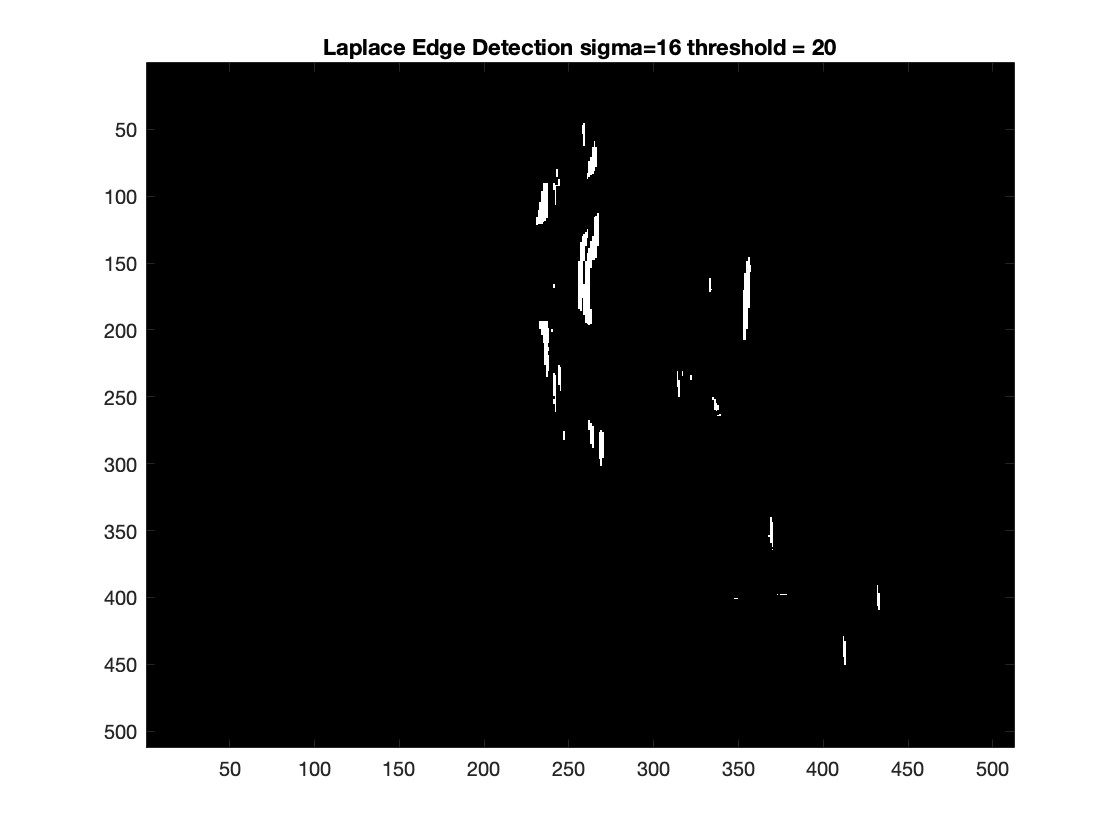

In [9]:
edgesthreshold20 = LaplacianEdgeDetection('neck_sagt2_im8.tif',16,20);
figure()
imagesc(edgesthreshold20); colormap gray
title('Laplace Edge Detection sigma=16 threshold = 20')


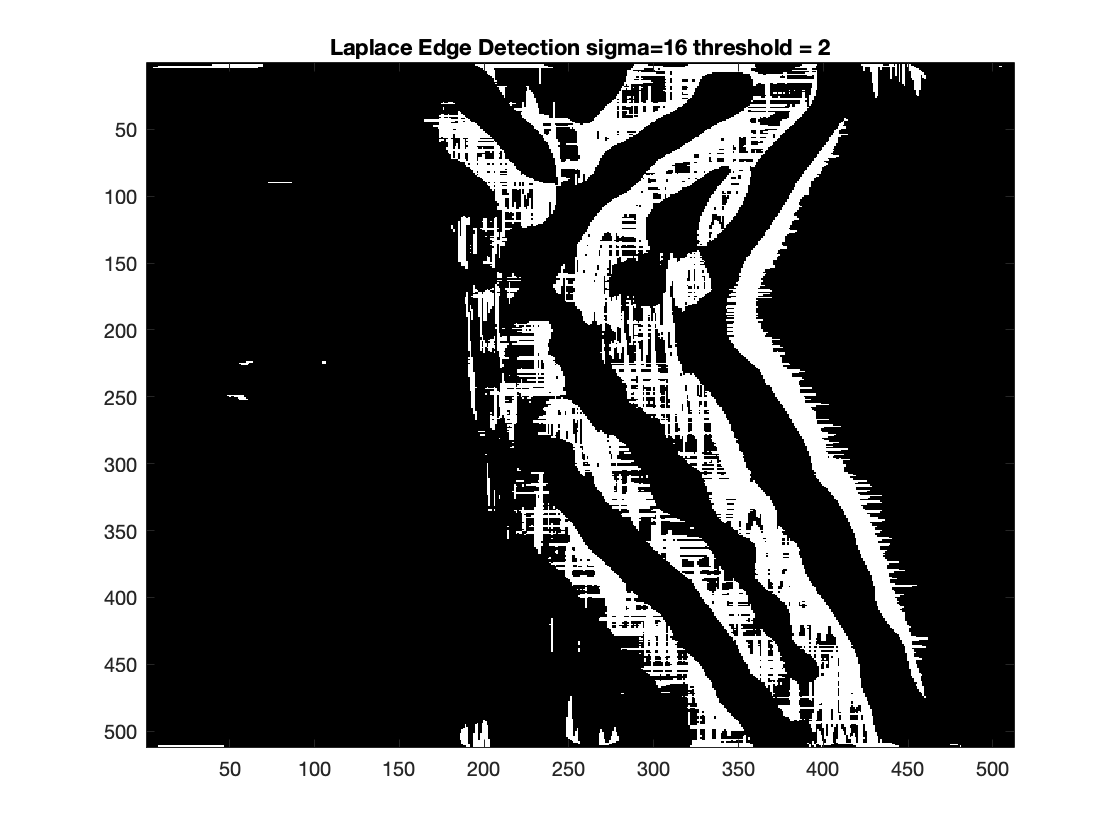

In [10]:
edgesthreshold2 = LaplacianEdgeDetection('neck_sagt2_im8.tif',16,2);
imagesc(edgesthreshold2); colormap gray
title('Laplace Edge Detection sigma=16 threshold = 2')


WIth greater blurring, there is lower gradient magnitude. With a lower threshold, you accept pixels with lower gradient so lowering the threshold is needed as sigma gets larger.


In [11]:
function grad_mag= GradientMagnitude(name,sigma)
dx = [0.5 0 -0.5];
dy= [0.5; 0; -0.5];
radius = 3*sigma;
kernal = [-radius:radius];
g = (1/sigma*sqrt(2*pi))*exp(-(kernal.^2)/(2*sigma^2));
gx = (1/sum(g)).*g;
gy = gx';
DoGx = conv2(gx,dy);
DoGy = conv2(gy,dx);
og_im = imread(name);
wrapped_im = repmat(og_im,3);
grad_x = convn(wrapped_im,DoGx,'same');
grad_y = convn(wrapped_im,DoGy,'same');
diff = length(grad_y)-length(wrapped_im);
grad= sqrt(grad_x.^2 + grad_y.^2);
grad_mag = zeros(size(og_im));
for i = 1:size(og_im,1)
     for j = 1:size(og_im,2)
         grad_mag(i,j) = grad(i+(1/3)*length(wrapped_im)+(1/2)*diff,j+(1/3)*length(wrapped_im)+(1/2)*diff);
     end
end
end

function laplace = Laplacian(name,sigma)
dx2 = [1 -2 1];
dy2 = dx2';
radius = 3*sigma;
kernal = [-radius:radius];
g = (1/sigma*sqrt(2*pi))*exp(-(kernal.^2)/(2*sigma^2));
gx = (1/sum(g)).*g;
gy = gx';
DoGx2 = conv2(gx,dy2);
DoGy2 = conv2(gy,dx2);
og_im = imread(name);
wrapped_im = repmat(og_im,3);
laplace_x = conv2(wrapped_im,DoGx2);
laplace_y = conv2(laplace_x,DoGy2);
diff = length(laplace_y)-length(wrapped_im);
laplace= zeros(size(og_im));
for i = 1:size(og_im,1)
     for j = 1:size(og_im,2)
         laplace(i,j) = laplace_y(i+(1/3)*length(wrapped_im)+(1/2)*diff,j+(1/3)*length(wrapped_im)+(1/2)*diff);
     end
end
end

function z_c = ZeroCrossings(name,sigma)
laplace = Laplacian(name,sigma);
z_c = zeros(size(laplace));
for i = 2:size(z_c,1)-1
    for j = 2:size(z_c,1)-1
        if (sign(laplace(i+1,j)) & sign(laplace(i-1,j)) & sign(laplace(i,j+1)) & sign(laplace(i,j-1))) ==sign(laplace(i,j))
            z_c(i,j) = 0;
        elseif (abs(laplace(i+1,j)) & abs(laplace(i-1,j)) & abs(laplace(i,j+1)) & abs(laplace(i,j-1))) > abs(laplace(i,j))
            z_c(i,j) = 1;
        end
    end
end
end

function I_filtered = LaplacianEdgeDetection(name,sigma,threshold)
grad_mag= GradientMagnitude(name,sigma);
z_c= ZeroCrossings(name,sigma);
 I_filtered = zeros(size(z_c));
 for i=1:size(I_filtered,1)
         for j=1:size(I_filtered,2)
             if grad_mag(i,j)>=threshold & z_c(i,j) == 1
                 I_filtered(i,j) = 1;
             else
                 I_filtered(i,j) = 0;
             end
         end
 end
end